 # ---> **LIBRERÍAS** <---

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

import tensorflow as tf
import keras.utils
import keras.losses
import keras.optimizers
import keras.metrics

from keras.models import Sequential
from keras.layers import Dense, Flatten

In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.9.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# ---> **IMPORTAR DATASETS** <---

In [3]:
lotes = 64
semilla = 33

nombre_dataset = 'cats20_probarV2'

train_directory = f'C:/Users/aleja/Downloads/{nombre_dataset}/TRAINING'
validation_directory = f'C:/Users/aleja/Downloads/{nombre_dataset}/VALIDATION'
test_directory = f'C:/Users/aleja/Downloads/{nombre_dataset}/TESTING'

In [4]:
def importarDatasets(dimensiones: tuple):
    
    train_dataset = keras.utils.image_dataset_from_directory(
                train_directory,
                labels='inferred',
                label_mode='categorical',
                image_size=dimensiones,
                batch_size=lotes,
                seed=semilla
    )

    validation_dataset = keras.utils.image_dataset_from_directory(
                validation_directory,
                labels='inferred',
                label_mode='categorical',
                image_size=dimensiones,
                batch_size=lotes,
                seed=semilla
    )

    testing_dataset = keras.utils.image_dataset_from_directory(
            test_directory,
            labels='inferred',
            label_mode='categorical',
            image_size=dimensiones,
            batch_size=lotes,
            seed=semilla
    )
    
    class_names = train_dataset.class_names
    num_classes = len(class_names)

    return train_dataset, validation_dataset, testing_dataset, num_classes

 # ---> **MODELO PROPIO** <---

In [5]:
from keras.layers import Rescaling, Conv2D, BatchNormalization, MaxPooling2D

dimensionesModelo4 = (224, 224)
train_dataset, validation_dataset, testing_dataset, num_classes = importarDatasets(dimensionesModelo4)

dimension_foto = dimensionesModelo4[0]

model4 = Sequential()

# Capa de normalización
model4.add(Rescaling(1./255))

model4.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=2))

model4.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=2))

model4.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=2))

model4.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=2))

model4.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=2))

model4.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=2))

# So padding="same" in Keras does not mean the spatial dimensions do not change. 
# It just means that padding is added as required to make up for overlaps when the input size and kernel size do not perfectly fit.

# I think the reason is to make pool_size and stride arguments compatible with the output shape of previous layers. 
# The command can be read as: in case it's not compatible, add padding all hyperparameters compatible.

model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))

model4.build(input_shape=(32, dimension_foto, dimension_foto, 3))
model4.summary()



Found 10910 files belonging to 31 classes.
Found 3100 files belonging to 31 classes.
Found 1544 files belonging to 31 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (32, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 224, 224, 16)        448       
                                                                 
 batch_normalization (BatchN  (32, 224, 224, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (32, 112, 112, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 112, 112, 32)        4640  

In [6]:
import time

model4.compile(
  loss=keras.losses.CategoricalCrossentropy(),
  optimizer=keras.optimizers.SGD(momentum=0.9),
  metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

inicio = time.time()

history = model4.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=40,
                    verbose=1,
                    shuffle=True,
)

fin = time.time()
tiempo = fin - inicio
minutos = int(tiempo/60)
print(f'Tiempo entrenamiento: {minutos} min {round(tiempo-60*minutos,2)} s')

Epoch 1/40
171/171 [==============================] - 23s 90ms/step - loss: 2.8883 - accuracy: 0.1869 - precision: 0.5104 - recall: 0.0338 - val_loss: 3.7526 - val_accuracy: 0.0684 - val_precision: 0.0196 - val_recall: 3.2258e-04
Epoch 2/40
171/171 [==============================] - 15s 85ms/step - loss: 2.3836 - accuracy: 0.3047 - precision: 0.5974 - recall: 0.1049 - val_loss: 2.8743 - val_accuracy: 0.1816 - val_precision: 0.3569 - val_recall: 0.0358
Epoch 3/40
171/171 [==============================] - 15s 85ms/step - loss: 2.1030 - accuracy: 0.3685 - precision: 0.6485 - recall: 0.1731 - val_loss: 3.0018 - val_accuracy: 0.2197 - val_precision: 0.3589 - val_recall: 0.1358
Epoch 4/40
171/171 [==============================] - 15s 83ms/step - loss: 1.8749 - accuracy: 0.4313 - precision: 0.6752 - recall: 0.2422 - val_loss: 2.0938 - val_accuracy: 0.3948 - val_precision: 0.6041 - val_recall: 0.2161
Epoch 5/40
171/171 [==============================] - 15s 84ms/step - loss: 1.6511 - accurac

 # ---> **RESULTADOS** <---

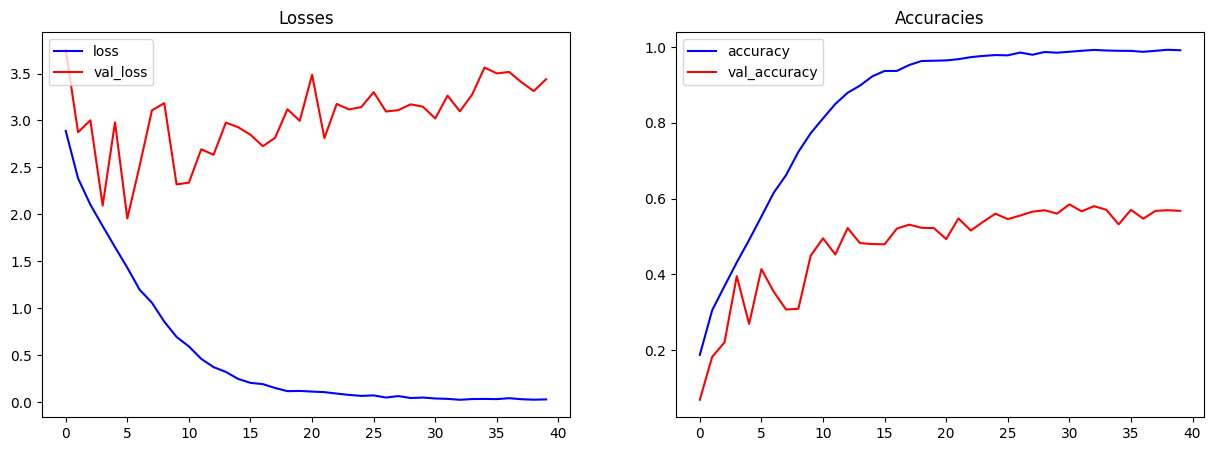

25/25 [==============================] - 2s 49ms/step - loss: 3.5165 - accuracy: 0.5544 - precision: 0.5759 - recall: 0.5427
***** Test Loss: 3.5164525508880615 *****
***** Test Accuracy: 0.5544041395187378 *****
***** Test Precision: 0.5759450197219849 *****
***** Test Recall: 0.5427461266517639 *****


In [7]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Losses')
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Accuracies')
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
plt.legend(loc="upper left")

plt.show()
#---------------------------------
test_loss, test_acc, test_precision, test_recall = model4.evaluate(testing_dataset, verbose=1)
print('***** Test Loss:', test_loss, '*****')
print('***** Test Accuracy:', test_acc, '*****')
print('***** Test Precision:', test_precision, '*****')
print('***** Test Recall:', test_recall, '*****')

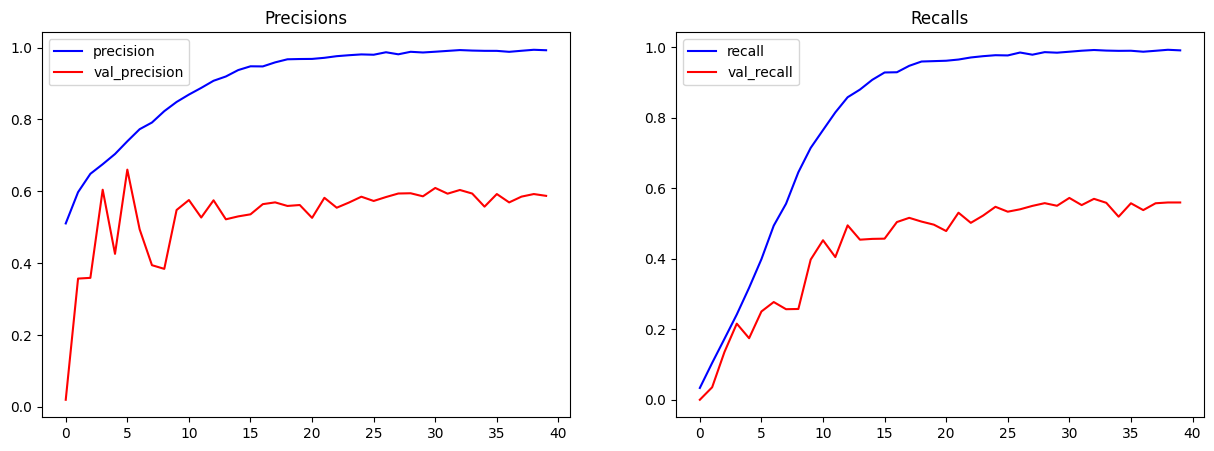

In [8]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Precisions')
plt.plot(history.history['precision'], color='blue', label='precision')
plt.plot(history.history['val_precision'], color='red', label='val_precision')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Recalls')
plt.plot(history.history['recall'], color='blue', label='recall')
plt.plot(history.history['val_recall'], color='red', label='val_recall')
plt.legend(loc="upper left")

plt.show()

 # ---> **PREDECIR IMÁGENES** <---

In [16]:
def predecir_imagenes(numFotosPredecir: int):
  directorio_base = test_directory
  lista_razas = os.listdir(directorio_base)

  figura = plt.figure(figsize=(12,8))
  class_names = os.listdir(train_directory)

  LISTA_NP_ARRAYS = []
  LISTA_RAZAS = []

  for i in range(numFotosPredecir): # nº de fotos a predecir
    raza_escogida = random.choice(lista_razas)
    LISTA_RAZAS.append(raza_escogida)
    directorio_raza = f'{directorio_base}/{raza_escogida}'
    nombre_imagen = random.choice(os.listdir(directorio_raza))
    print(directorio_raza, '::', nombre_imagen)

    imagen = Image.open(f'{directorio_raza}/{nombre_imagen}')
    imagen = imagen.resize(dimensionesModelo4)
    imagen = np.array(imagen)
    LISTA_NP_ARRAYS.append(imagen) # añado el numpy array
    imagen = np.expand_dims(imagen, axis=0)

    prediction_array = model4(imagen)  
    index_predicted = np.argmax(prediction_array)
    label_predicted = class_names[index_predicted]
    #------------------------------------------------------
    figura.add_subplot(2,3,i+1)
    plt.imshow(LISTA_NP_ARRAYS[i])
    plt.axis(False)
    plt.title(f"{LISTA_RAZAS[i]}\n Predicted: {label_predicted}")
  
  plt.show()

C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Nebelung :: Nebelung_9.jpg
C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Scottish Fold :: Scottish Fold_147.jpg
C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Tabby :: Tabby_205.jpg
C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Siamese :: Siamese_411.jpg
C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Tuxedo :: Tuxedo_291.jpg
C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Bombay :: Bombay_30.jpg


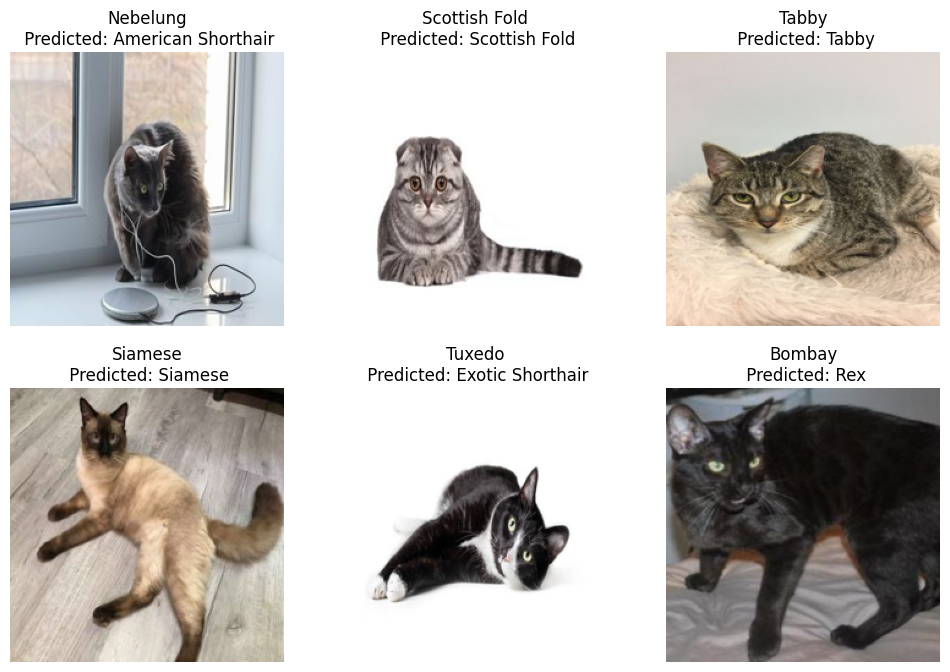

In [17]:
predecir_imagenes(6)

# ---> **MATRIZ DE CONFUSIÓN BUENA** <---

In [18]:
predicted_labels = []
true_labels = []

datasetIterator = list(testing_dataset.as_numpy_iterator()) # 25 batches de 64

for imagenes, labels in datasetIterator: # datasetIterator: lista de 25 tuplas, cada tupla con 64 imágenes y 64 labels
    true_labels += list(np.argmax(labels, axis=1)) # OK

    lote = imagenes/255
    predicciones = model4.predict(imagenes)
    predicted_labels += list(np.argmax(predicciones, axis=1))   

1/1 [==============================] - 0s 85ms/step


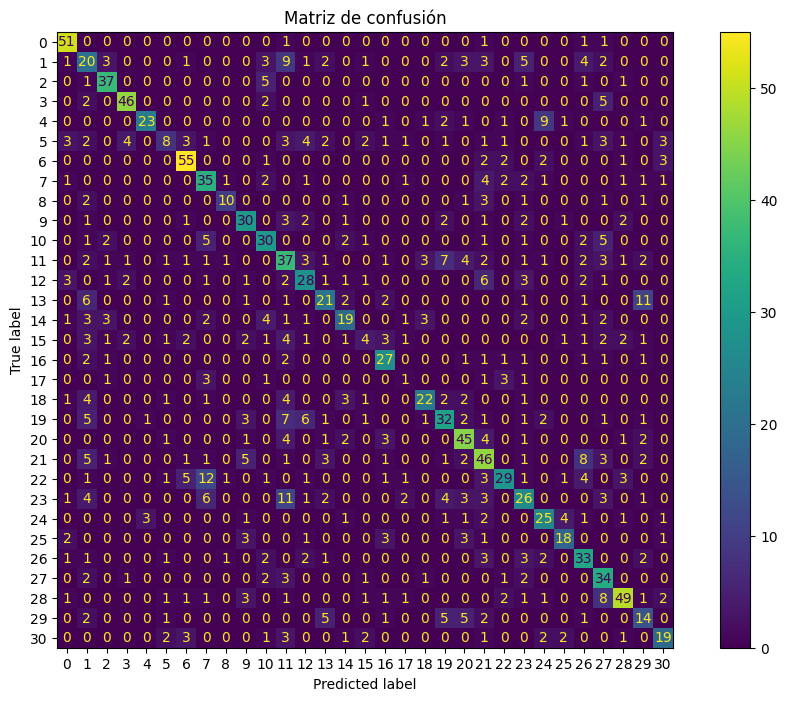

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

matrix = confusion_matrix(true_labels, predicted_labels)

figura, axes = plt.subplots(figsize=(12, 8))
confusionMatrix = ConfusionMatrixDisplay(matrix)  # display_labels=lista_razas_test
confusionMatrix.plot(ax=axes, cmap='viridis')
confusionMatrix.ax_.set_title("Matriz de confusión")

plt.show()

# **MÉTRICAS**

In [9]:
from sklearn.metrics import classification_report

In [10]:
predicted_labels = []
true_labels = []

datasetIterator = list(testing_dataset.as_numpy_iterator()) # 25 batches de 64

for imagenes, labels in datasetIterator: # datasetIterator: lista de 25 tuplas, cada tupla con 64 imágenes y 64 labels
    true_labels += list(np.argmax(labels, axis=1)) # OK

    lote = imagenes/255
    predicciones = model4.predict(imagenes)
    predicted_labels += list(np.argmax(predicciones, axis=1))   

1/1 [==============================] - 0s 95ms/step


In [11]:
valores = classification_report(true_labels, predicted_labels, output_dict=True, zero_division=0)

valores['weighted avg']

{'precision': 0.5548223201678935,
 'recall': 0.5544041450777202,
 'f1-score': 0.5463168935975296,
 'support': 1544.0}

# ---> **GUARDAR Y CARGAR MODELO** <---

In [20]:
import keras
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [12]:
model4.save("MendozasNet56v3.keras")
instancia = keras.models.load_model("MendozasNet56v3.keras")

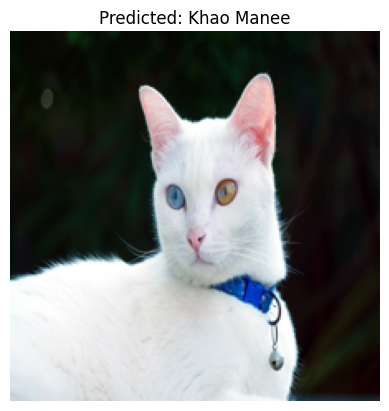

In [13]:
imagen22 = Image.open('AAkhao-manee.jpg')
imagen22 = imagen22.resize(dimensionesModelo4)
imagen22 = np.array(imagen22)
auxiliar = imagen22
imagen22 = np.expand_dims(imagen22, axis=0)

class_names = os.listdir(test_directory)

prediction_array = instancia(imagen22) 
index_predicted = np.argmax(prediction_array[0]) # [[...]]
label_predicted = class_names[index_predicted]

plt.imshow(auxiliar)
plt.axis(False)
plt.title(f'Predicted: {label_predicted}')
plt.show()